<>:64: SyntaxWarning: invalid escape sequence '\d'
<>:64: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gtsch\AppData\Local\Temp\ipykernel_2900\593514389.py:64: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Comparison of $\delta(x)$ for Two Models', fontsize=16)


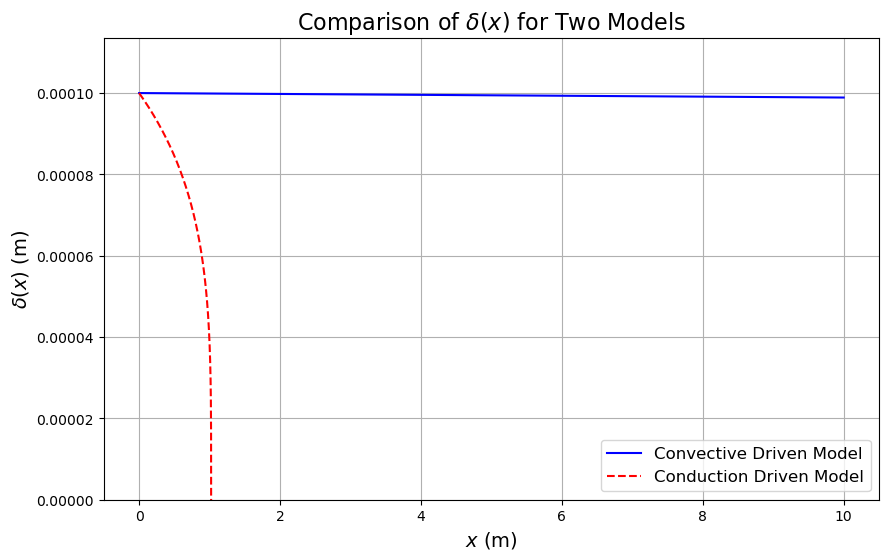

In [31]:
 import numpy as np
import matplotlib.pyplot as plt

# Constants
L_v = 2.5e6        # Latent heat of vaporization (J/kg)
R_v = 461.5        # Specific gas constant for water vapor (J/(kg·K))
R_air = 287        # Specific gas constant for dry air (J/(kg·K))
T_0 = 273.15       # Reference temperature (K)
e_0 = 611.2        # Reference vapor pressure at T_0 (Pa)

# Wall temperatures
T_b_C = 20         # Bottom boundary temperature (°C)
T_inf_C = 5       # Far-field temperature (°C)
T_delta_C = 19     # Temperature at delta (°C)

# Film properties
delta_0 = 1e-4     # Initial film thickness (m)
h_m = 0.001        # Mass transfer coefficient (m/s)

# Convert temperatures to Kelvin
T_b = T_b_C + 273.15
T_inf = T_inf_C + 273.15
T_delta = T_delta_C + 273.15

# Clausius-Clapeyron function to compute saturation vapor pressure
def e_s(T, T_0, e_0, L_v, R_v):
    return e_0 * np.exp(L_v / R_v * (1/T_0 - 1/T))

# Compute vapor pressures
e_s_Tb = e_s(T_b, T_0, e_0, L_v, R_v)  # Saturation vapor pressure at T_b
e_inf = e_s(T_inf, T_0, e_0, L_v, R_v) # Vapor pressure far from the film

g = 9.81        # Gravitational acceleration (m/s²)
mu = 1e-3       # Dynamic viscosity of liquid (kg/(m·s))
rho_l = 1000    # Density of liquid (kg/(m³))
k = 0.6         # Thermal conductivity (W/(m·K))

#  range of x values
x = np.linspace(0, 10, 10000)

# fractional power function to handle negative values
def fractional_power(value, power):
    return np.sign(value) * (np.abs(value)**power)

# Calculate delta for the first equation
term1 = delta_0**3
term2 = (3 * mu * h_m / (rho_l**2 * g)) * ((e_s_Tb / (R_v * T_b)) - (e_inf / (R_v * T_inf))) * x
delta_1 = fractional_power(term1 - term2, 1/3)

# Calculate delta for the second equation
term1_2 = delta_0**4
term2_2 = (4*mu * k * (T_b - T_delta)) / (g * rho_l**2 * L_v) * x
delta_2 = fractional_power(term1_2 - term2_2, 1/4)


plt.figure(figsize=(10, 6))
plt.plot(x, delta_1, label= 'Convective Driven Model', color='blue')
plt.plot(x, delta_2, label=r'Conduction Driven Model', color='red', linestyle='--')


plt.xlabel(r'$x$ (m)', fontsize=14)
plt.ylabel(r'$\delta(x)$ (m)', fontsize=14)
plt.title('Comparison of $\delta(x)$ for Two Models', fontsize=16)
plt.legend(fontsize=12)
plt.grid()


plt.ylim(bottom=0)

plt.show()